Paper: https://doi.org/10.1038/s41598-022-26644-7
data: https://openneuro.org/datasets/ds002778/versions/1.0.5
George, J. S. et al. Dopaminergic therapy in Parkinson’’s disease decreases cortical beta band coherence in the resting state and 
increases cortical beta band power during executive control. Neuroimage Clin. 8(3), 261–270 (2013).

learning and replicating DWT (db4) 
1. why dB4? 
READ- Rajendra Acharya, U., Vinitha Sree, S., Swapna, G., Martis, R. J. & Suri, J. S. Automated EEG analysis of epilepsy: A review. Knowl. 
Based Syst. 45, 147–165 (2013).

2. wavelet packet for reconstruction 
3. entropy calcuations
4. ML model


dataset:
/1. off-ses, PD : off medication, with parkinson disease
/2. off-ses, HC: off medication, with health control

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import mne
from scipy.signal import resample
import pywt




In [84]:
data_pd_rest_channels =  data_pd_rest_channels =  r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\openNeuro\sub-pd28\ses-off\eeg\sub-pd28_ses-off_task-rest_channels.tsv"



data_hc_rest_channels = r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\openNeuro\sub-hc29\ses-hc\eeg\sub-hc29_ses-hc_task-rest_channels.tsv"

In [85]:
data_pd = pd.read_csv(data_pd_rest_channels, sep='\t')
data_hc = pd.read_csv(data_hc_rest_channels, sep='\t')

In [86]:
bdf_pd=r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\openNeuro\sub-pd28\ses-off\eeg\sub-pd28_ses-off_task-rest_eeg.bdf"

In [87]:
data_pd.head()


,name,type,units,low_cutoff,high_cutoff,description,sampling_frequency,status
0,Fp1,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
1,AF3,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
2,F7,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
3,F3,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
4,FC1,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good


In [88]:
data_hc.head()

,name,type,units,low_cutoff,high_cutoff,description,sampling_frequency,status
0,Fp1,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
1,AF3,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
2,F7,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
3,F3,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good
4,FC1,EEG,µV,0.0,104.0,ElectroEncephaloGram,512.0,good


In [89]:
bdf_pd_data = mne.io.read_raw_bdf(bdf_pd, preload=True)

Extracting EDF parameters from C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\openNeuro\sub-pd28\ses-off\eeg\sub-pd28_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...


## For less time-stamps do this:

In [44]:

sfreq = bdf_pd_data.info['sfreq']  
print(f"Sampling rate: {sfreq} Hz")
 
duration_in_seconds = 2.5
n_samples = int(sfreq * duration_in_seconds)

shortened_data = bdf_pd_data.copy().crop(tmin=0, tmax=duration_in_seconds)
shortened_data.plot(duration=2.5, scalings='auto')

Sampling rate: 512.0 Hz


Channels marked as bad:
none


## otherwise directly do this:

In [90]:
print(bdf_pd_data.info) 

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-10 10:28:57 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


# for less timestamps, u hv to use shortened data:


In [46]:
raw_filtered = shortened_data.copy().filter(l_freq=0.05, h_freq=50) 


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33793 samples (66.002 s)



C:\Users\HP\AppData\Local\Temp\ipykernel_29764\3216816756.py:1: RuntimeWarning: filter_length (33793) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = shortened_data.copy().filter(l_freq=0.05, h_freq=50)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [91]:
raw_filtered = bdf_pd_data.copy().filter(l_freq=0.05, h_freq=50) 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33793 samples (66.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [92]:
from mne.preprocessing import ICA


ica = ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw_filtered)

ica.exclude = []
eog_indices, eog_scores = ica.find_bads_eog(raw_filtered, ch_name='Fp1')
ica.exclude = eog_indices


raw_cleaned = ica.apply(raw_filtered)


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 1.2s.
Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12

In [93]:
# Transpose the data to have samples on the rows and channels on the columns, if necessary
data, times = raw_cleaned.get_data(return_times=True)


In [94]:
pre_process_channel = pd.DataFrame(data.T, index=times, columns=raw_cleaned.ch_names)

<Axes: title={'center': 'Selected EEG Channels After ICA Cleaning'}>

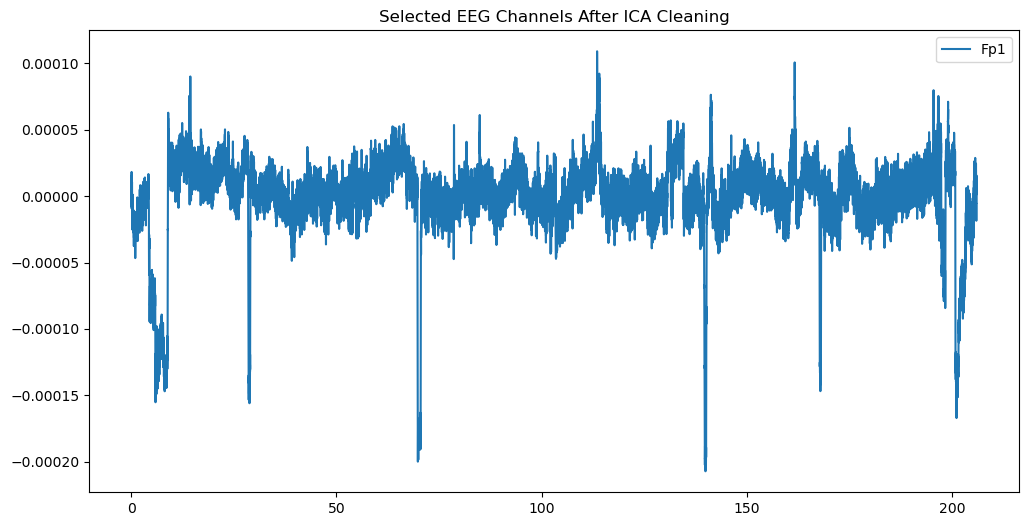

In [95]:
# Plot specific channels, e.g., 'Fp1' and 'Fp2'
pre_process_channel[['Fp1']].plot(figsize=(12, 6), legend=True, title='Selected EEG Channels After ICA Cleaning')


In [96]:
raw_cleaned


<RawEDF | sub-pd28_ses-off_task-rest_eeg.bdf, 41 x 105472 (206.0 s), ~33.0 MB, data loaded>

In [97]:
# Plot raw data after artifact removal for visual inspection
raw_cleaned.plot(scalings="auto", title="Cleaned EEG Data", show=True, block=True)


Channels marked as bad:
none


In [115]:
len(raw_cleaned)

105472

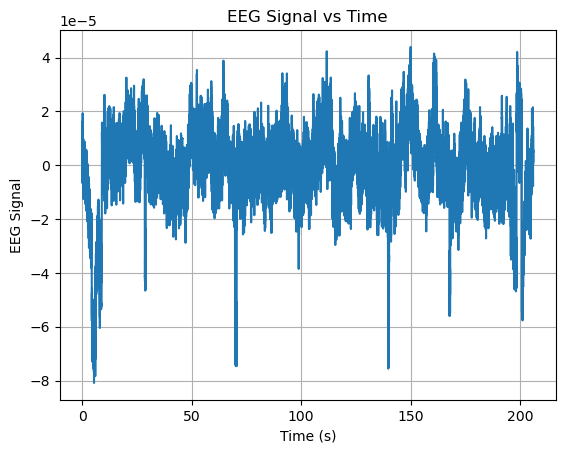

In [99]:
column_index= 3

channel_data = data[column_index, :]    

plt.figsize=(2000, 1000)
plt.plot(times, channel_data)
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.title('EEG Signal vs Time')
plt.grid(True)
plt.show()



In [100]:
# Downsample the signal
sampling_frequency = 512
new_sampling_frequency = 128 
num_samples = int(len(channel_data) * new_sampling_frequency / sampling_frequency)
time_samples = int(len(times) * new_sampling_frequency / sampling_frequency)
resampled_data = resample(channel_data, num_samples)
resampled_time = resample(times, num_samples)


In [101]:
print(len(resampled_data))
print(len(channel_data))
print(len(resampled_time))


26368
105472
26368


In [102]:
sampling_frequency

512

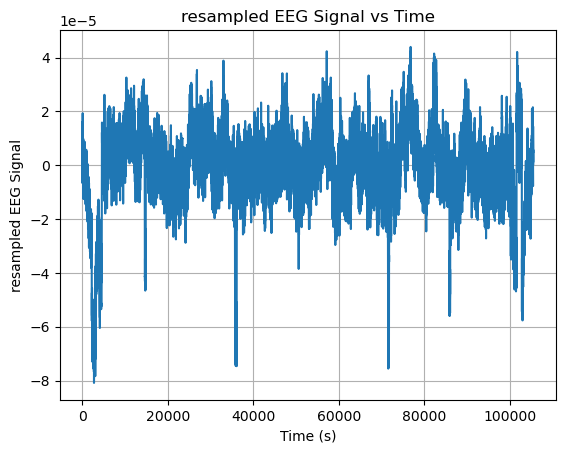

In [103]:
plt.figsize=(20, 10)
plt.plot( channel_data)
plt.xlabel('Time (s)')
plt.ylabel('resampled EEG Signal')
plt.title('resampled EEG Signal vs Time')
plt.grid(True)
plt.show()

In [104]:

#plt.show()

In [105]:
wavelet = 'db4'

max_level = pywt.dwt_max_level(data_len=len(channel_data), filter_len=pywt.Wavelet('db4').dec_len)
print(max_level)
coeffs_1 = pd.DataFrame(pywt.wavedec(channel_data, wavelet, level=1))
coeffs_2 = pd.DataFrame(pywt.wavedec(channel_data, wavelet, level=2))
coeffs_3 = pd.DataFrame(pywt.wavedec(channel_data, wavelet, level=3))

print(coeffs_1.shape)
print(coeffs_2.shape)
print(coeffs_3.shape)

#approx_coeffs = pd.DataFrame(coeffs[0] )
#detail_coeffs =  pd.DataFrame(coeffs[1] )
#print(approx_coeffs.head())
#print(detail_coeffs.head())


13
(2, 52739)
(3, 52739)
(4, 52739)


In [106]:
wavelet = 'db4'

max_level = pywt.dwt_max_level(data_len=len(resampled_data), filter_len=pywt.Wavelet('db4').dec_len)
print(max_level)
coeffs_1 = pd.DataFrame(pywt.wavedec(resampled_data, wavelet, level=1))
coeffs_2 = pd.DataFrame(pywt.wavedec(resampled_data, wavelet, level=2))
coeffs_3 = pd.DataFrame(pywt.wavedec(resampled_data, wavelet, level=3))

print(coeffs_1.shape)
print(coeffs_2.shape)
print(coeffs_3.shape)

#approx_coeffs = pd.DataFrame(coeffs[0] )
#detail_coeffs =  pd.DataFrame(coeffs[1] )
#print(approx_coeffs.head())
#print(detail_coeffs.head())


11
(2, 13187)
(3, 13187)
(4, 13187)


In [107]:
len(resampled_data)

26368

however theoretically meausered, decomposition level is 8;
in paper they have used level 4

In [110]:
wavelet = 'db8'
coeffs = pd.DataFrame(pywt.wavedec(resampled_data, wavelet, level=4)) 
#print(coeffs.shape)
cA8 =  pd.DataFrame(coeffs[0] )
cD_1 =  pd.DataFrame(coeffs[1] )
cD_2 =  pd.DataFrame(coeffs[2] )
cD_3 =  pd.DataFrame(coeffs[3] )
cD_4 =  pd.DataFrame(coeffs[4] )

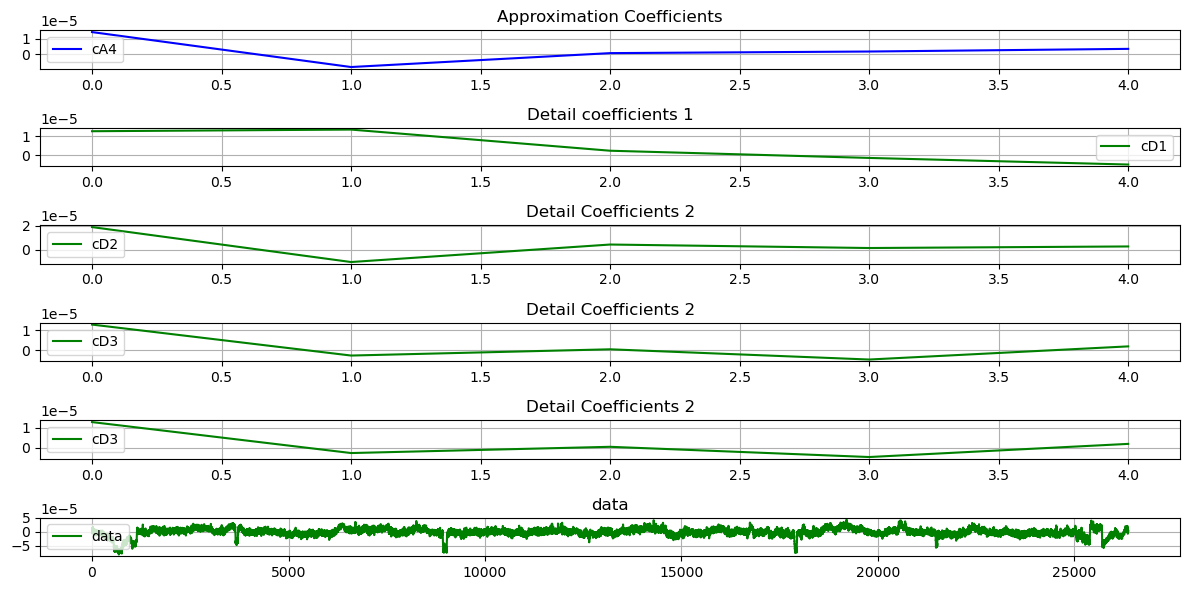

In [111]:
plt.figure(figsize=(12,6))

plt.subplot(6,1,1)
plt.plot(cA8, 'b', label = 'cA4')
plt.title('Approximation Coefficients')
plt.grid()
plt.legend()


plt.subplot(6,1,2)
plt.plot(cD_1, 'g', label = 'cD1')
plt.title('Detail coefficients 1')
plt.grid()
plt.legend()

plt.subplot(6,1,3)
plt.plot(cD_2, 'g', label = 'cD2')
plt.title('Detail Coefficients 2')
plt.grid()
plt.legend()

plt.subplot(6,1,4)
plt.plot(cD_3, 'g', label = 'cD3')
plt.title('Detail Coefficients 2')
plt.grid()
plt.legend()


plt.subplot(6,1,5)
plt.plot(cD_3, 'g', label = 'cD3')
plt.title('Detail Coefficients 2')
plt.grid()
plt.legend()


plt.subplot(6,1,6)
plt.plot(resampled_data, 'g', label = 'data')
plt.title('data')
plt.grid()
plt.legend()



plt.tight_layout()
plt.show()

FROM MNE, using pre-processing:


In [112]:
max_level = pywt.dwt_max_level(data_len=len(pre_process_channel['Fp1']), filter_len=pywt.Wavelet('db4').dec_len)
print(max_level)

13


In [113]:
wavelet = 'db4'
coeffs = pd.DataFrame(pywt.wavedec(pre_process_channel['Fp1'], wavelet, level=4))
cA4 =  pd.DataFrame(coeffs[0] )
cD1 =  pd.DataFrame(coeffs[1] )
cD2 =  pd.DataFrame(coeffs[2] )
cD3 =  pd.DataFrame(coeffs[3] )

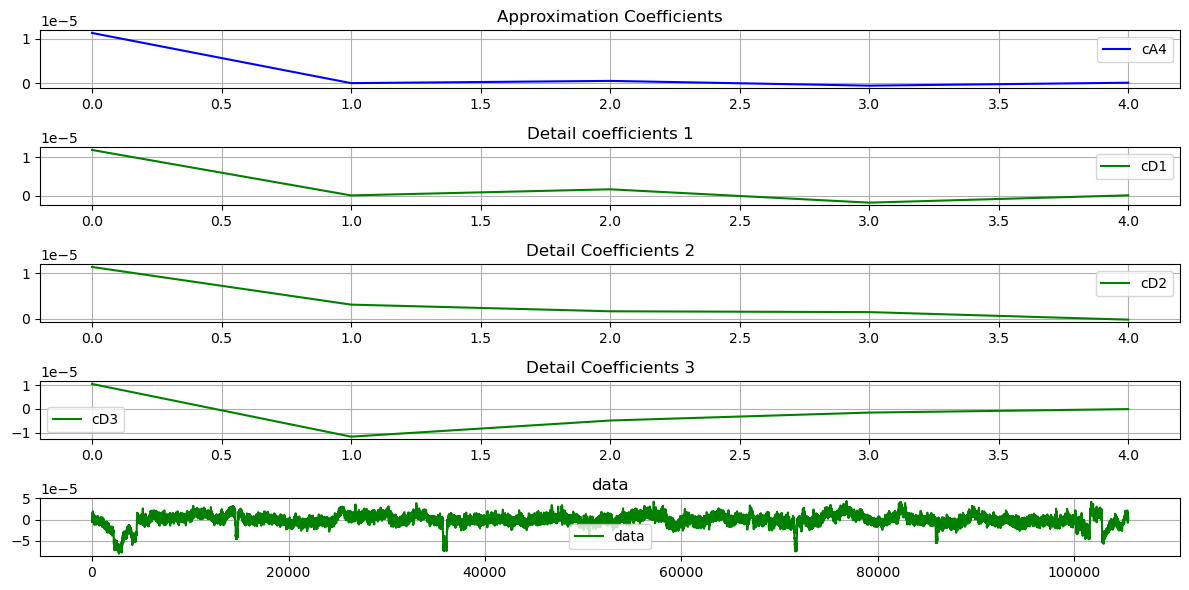

In [114]:
plt.figure(figsize=(12,6))

plt.subplot(5,1,1)
plt.plot(cA4, 'b', label = 'cA4')
plt.title('Approximation Coefficients')
plt.grid()
plt.legend()


plt.subplot(5,1,2)
plt.plot(cD1, 'g', label = 'cD1')
plt.title('Detail coefficients 1')
plt.grid()
plt.legend()

plt.subplot(5,1,3)
plt.plot(cD2, 'g', label = 'cD2')
plt.title('Detail Coefficients 2')
plt.grid()
plt.legend()

plt.subplot(5,1,4)
plt.plot(cD3, 'g', label = 'cD3')
plt.title('Detail Coefficients 3')
plt.grid()
plt.legend()

plt.subplot(5,1,5)
plt.plot(channel_data, 'g', label = 'data')
plt.title('data')
plt.grid()
plt.legend()




plt.tight_layout()
plt.show()